# Assignment 5 - Time Series Analysis
## Data Science Tools I
### Professor: Don Dalton

---

### Student: Duncan Ferguson

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.arima.model import ARIMA
from statistics import mean
from prophet import Prophet
from sklearn.metrics import mean_squared_error

ModuleNotFoundError: No module named 'prophet'

# Question 1 - Importing the Datasets

## Part (a)
### 8 points

Download the .csv files (CurrentPrices, EmploymentRate, ProductionVolume, and Sales) linked on Canvas on the assignment page and place them in a local repository alongside your notebook file. (If on Google Colab, upload the files to the colab.) Use Pandas to read each .csv file into its own variable.

After inspecting the first few rows of each data frame, clean up each data frame by converting the `Date` column to Datetime objects, then setting the index of the data frame to be the `Date` values to convert the data frame into a series.

Plot each dataset with an appropriate title, either individually in separate code cells or all together in a single plot using subplots.

In [7]:
CurrentPrices = pd.read_csv('CurrentPrices.csv') # Importing Current Prices
CurrentPrices['Date'] = pd.to_datetime(CurrentPrices['Date'])  # Casting Date as Datetime Object
CurrentPrices.sort_values(by=['Date'], inplace=True)  # Sorting the Values... Just in case
CurrentPrices.set_index('Date', inplace=True)
CurrentPrices.head()

,Current_price
Date,
1997-01-01,149
1997-04-01,151
1997-07-01,154
1997-10-01,155
1998-01-01,157


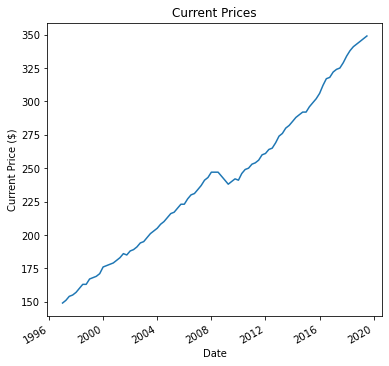

In [8]:
plt.figure(figsize=(6,6))
plt.plot(CurrentPrices)
plt.title("Current Prices")
plt.xlabel("Date")
plt.ylabel("Current Price ($)")
plt.gcf().autofmt_xdate()
plt.show()

In [9]:
EmploymentRate = pd.read_csv('EmploymentRate.csv')
EmploymentRate['Date'] = pd.to_datetime(EmploymentRate['Date'])
EmploymentRate.sort_values(by=['Date'], inplace=True)
EmploymentRate.set_index('Date', inplace=True)
EmploymentRate.head()

,Empl_Rate
Date,
1971-02-01,72.2
1971-03-01,72.1
1971-04-01,72.0
1971-05-01,72.0
1971-06-01,71.9


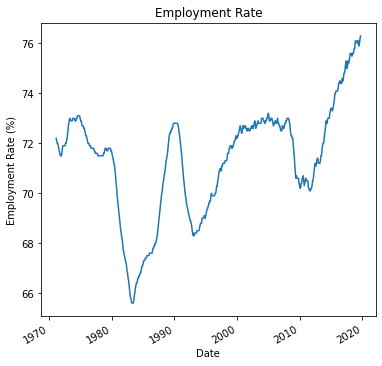

In [10]:
plt.figure(figsize=(6,6))
plt.plot(EmploymentRate)
plt.title("Employment Rate")
plt.xlabel("Date")
plt.ylabel("Employment Rate (%)")
plt.gcf().autofmt_xdate()
plt.show()

In [11]:
ProductionVolume = pd.read_csv('ProductionVolume.csv')
ProductionVolume['Date'] = pd.to_datetime(ProductionVolume['Date'])
ProductionVolume.sort_values(by=['Date'], inplace=True)
ProductionVolume.set_index('Date', inplace=True)
ProductionVolume.head()

,IOP
Date,
1995-01-01,89.9
1995-02-01,93.3
1995-03-01,108.2
1995-04-01,91.0
1995-05-01,101.2


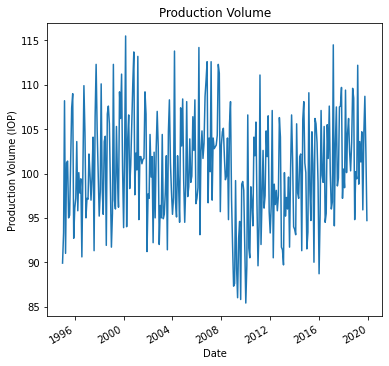

In [12]:
plt.figure(figsize=(6,6))
plt.plot(ProductionVolume)
plt.title("Production Volume")
plt.xlabel("Date")
plt.ylabel("Production Volume (IOP)")
plt.gcf().autofmt_xdate()
plt.show()

In [13]:
Sales = pd.read_csv('Sales.csv')
Sales['Date'] = pd.to_datetime(Sales['Date'])
Sales.sort_values(by=['Date'], inplace=True)
Sales.set_index('Date', inplace=True)
Sales.head()

,Sales
Date,
2007-01-01,240
2007-02-01,235
2007-03-01,232
2007-04-01,178
2007-05-01,180


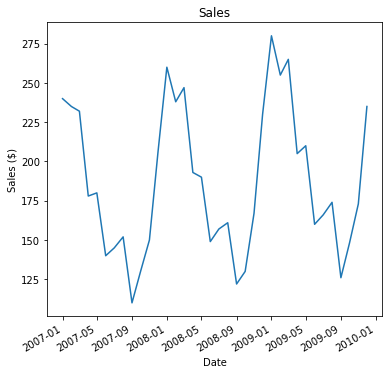

In [14]:
plt.figure(figsize=(6,6))
plt.plot(Sales)
plt.title("Sales")
plt.xlabel("Date")
plt.xticks()
plt.ylabel("Sales ($)")
plt.gcf().autofmt_xdate()
plt.show()

## Part (b)
### 4 points

Based on the plots you created in part (a), determine which pattern each dataset falls into and suggest a corresponding forecasting technique to match each pattern. For pattern and forecasting technique, limit your choice to the following options:

> **Patterns:** Horizontal, Trend, Seasonal without Trend, Seasonal with Trend

> **Forecasting Technique:** Naive Forecasting, Moving Average Smoothing, Exponential Smoothing, Regression Analysis, Regression Analysis with Dummy Variables

To answer this question, EDIT THIS TEXT CELL by replacing the x's below with your answers (as opposed to typing in a code cell).

Dataset | Pattern                  | Forecasting Technique
--- |--------------------------| ---
CurrentPrice | Trend                    | Regrestion Analysis
EmploymentRate | Trend   - Or Horizontal  | Moving Averager or Exponential Smoothing
ProductionVolume | Seasonal without a trend | Regression with Dummy Variables
Sales | Seasonal_with_Trend      | Regression with Dummy Variables


# Question 2 - Examining the Data

For this question and the subsequent ones, we will use the **ProductionVolume** dataset as the time series of interest.

## Part (a)
### 4 points

To start, check the stationarity of the data by plotting the rolling mean and standard deviation alongside the data itself. 

Based on your plot, is the data stationary? Provide reasons with your answes. Include your answer either as a text cell or in-line comment.

In [15]:
ProductionVolume["Rolling Average"] = ProductionVolume['IOP'].rolling(window=12).mean()
ProductionVolume["Rolling STD"] = ProductionVolume['IOP'].rolling(window=12).std()
ProductionVolume

,IOP,Rolling Average,Rolling STD
Date,,,
1995-01-01,89.9,NaN,NaN
1995-02-01,93.3,NaN,NaN
1995-03-01,108.2,NaN,NaN
1995-04-01,91.0,NaN,NaN
1995-05-01,101.2,NaN,NaN
...,...,...,...
2019-08-01,95.9,102.708333,5.392833
2019-09-01,104.6,102.800000,5.416809
2019-10-01,108.7,102.725000,5.319454


Text(0.5, 1.0, 'Production Volume')

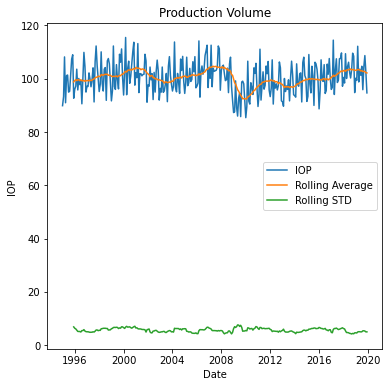

In [16]:
plt.figure(figsize=(6,6))
sns.lineplot(x='Date', y='IOP', data=ProductionVolume, label='IOP')
sns.lineplot(x='Date', y='Rolling Average', data=ProductionVolume, label='Rolling Average')
sns.lineplot(x='Date', y='Rolling STD', data=ProductionVolume, label='Rolling STD')
plt.title("Production Volume")


In [17]:
ProductionVolume['Year'] = ProductionVolume.index.year
ProductionVolume['Month'] = ProductionVolume.index.month
Roll_Piv = pd.pivot_table(ProductionVolume, index=['Month'], columns=['Year'], values=['Rolling Average'])
IOP_PIV = pd.pivot_table(ProductionVolume, index=['Month'], columns=['Year'], values=['IOP'])
STD_PIV = pd.pivot_table(ProductionVolume, index=['Month'], columns=['Year'], values=['Rolling STD'])

Text(0.5, 1.0, 'Monthly Rolling Average by Year')

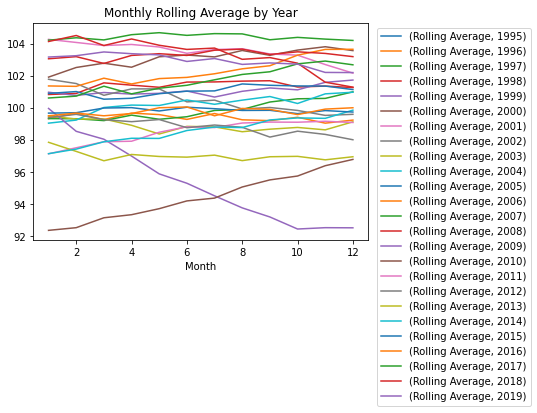

In [18]:
Roll_Piv.plot()
plt.legend(bbox_to_anchor=(1.5, 1), loc='upper right')
plt.title('Monthly Rolling Average by Year')

Text(0.5, 1.0, 'Monthly Rolling STD by Year')

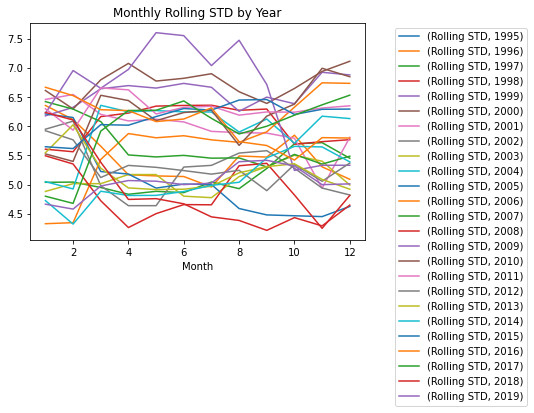

In [19]:
STD_PIV.plot()
plt.legend(bbox_to_anchor=(1.5, 1), loc='upper right')
plt.title('Monthly Rolling STD by Year')

Text(0.5, 1.0, 'Monthly Rolling STD by Year')

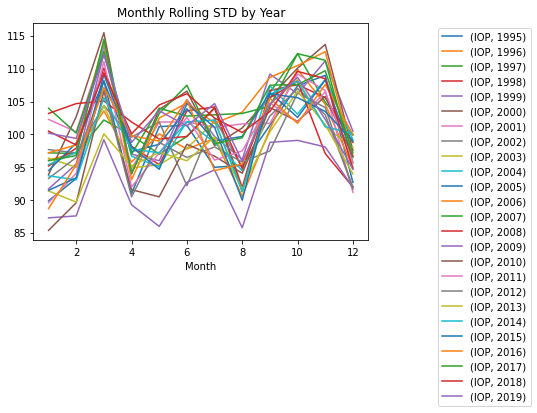

In [20]:
IOP_PIV.plot()
plt.legend(bbox_to_anchor=(1.5, 1), loc='upper right')
plt.title('Monthly Rolling STD by Year')

In [21]:
# Augmented Dickey-Fuller Test to Test Stationarity
def run_adftest(s):
  print("Dickey-Fuller Test")
  adftest = adfuller(s, autolag='AIC')
  print(f"Test Statistic: {adftest[0]}")
  print(f"p-value: {adftest[1]}")
  print("Critical Values:")
  for k, v in adftest[4].items():
      print("\t{}: {} - The data is{} stationary with {}% confidence".format(k, v, " not" if v<adftest[0] else "", 100-int(k[:-1])))

run_adftest(ProductionVolume['IOP'])

Dickey-Fuller Test
Test Statistic: -4.075364429398538
p-value: 0.0010634304413763525
Critical Values:
	1%: -3.4535050041524245 - The data is stationary with 99% confidence
	5%: -2.8717352599720294 - The data is stationary with 95% confidence
	10%: -2.5722024776854417 - The data is stationary with 90% confidence


 ## THE DATE IS STATIONARY.
## The low P-Value indicates that the series is stationary. But by looking at the graph the Rolling mean is holding a pretty consistent horizontal line around 100 IOP. The standard deviation is also holding a horizontal line. Looking at the Monthly IOP by Year Graphs you can see that the data is seasonal with peaks in production around month 3 and 10and dips in 4, and 8.

## Part (b)
### 4 points

Use `seasonal_decompose` to observe the trend, seasonality, and residuals for the data by plotting all plots alongside one another.

Based on your plots, is there a cyclical pattern in the data? Provide reasons with your answers. Include your answer either as a text cell or in-line comment.

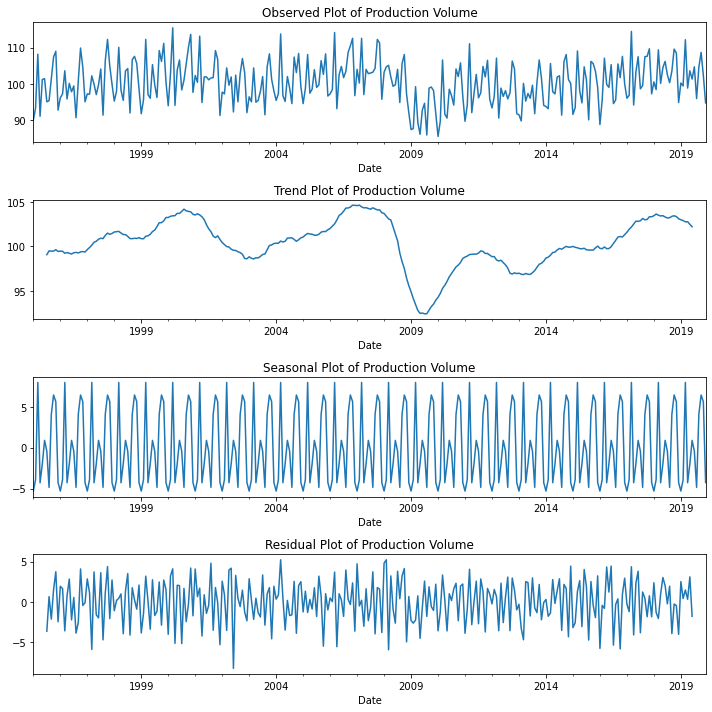

In [22]:
df = seasonal_decompose(ProductionVolume['IOP'])
fig, (ax0, ax1, ax2, ax3) = plt.subplots(4,1, figsize=(10,10))
ProductionVolume['IOP'].plot(ax=ax0)
df.trend.plot(ax=ax1)
df.seasonal.plot(ax=ax2)
df.resid.plot(ax=ax3)


ax0.set_title("Observed Plot of Production Volume")
ax1.set_title("Trend Plot of Production Volume")
ax2.set_title("Seasonal Plot of Production Volume")
ax3.set_title("Residual Plot of Production Volume")
plt.tight_layout()

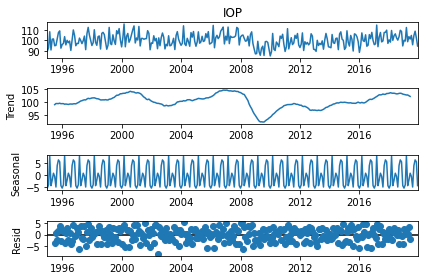

In [23]:
seasonal_decompose(ProductionVolume['IOP']).plot();

## Is there a cyclical patter in the Data? Yes. This can be seen by the up and down peaks that are currently present in the Seasonal plot of Production Volume. It can also be seen in the Monthly IOP by Year plots.


## Part (c)
### 4 points

To further confirm stationarity or non-stationarity, perform the Dickey-Fuller Test on the data. You may use the `run_adftest` method provided in lecture.

#### Based on the result, is any differencing needed? If so, first-order difference the data and re-run the Dickey-Fuller Test to see if the results change.

In [24]:
# Augmented Dickey-Fuller Test to Test Stationarity
def run_adftest(s):
  print("Dickey-Fuller Test")
  adftest = adfuller(s, autolag='AIC')
  print(f"Test Statistic/ADF Stat: {adftest[0]}")
  print(f"p-value: {adftest[1]}")
  print("Critical Values:")
  for k, v in adftest[4].items():
      print("\t{}: {} - The data is{} stationary with {}% confidence".format(k, v, " not" if v<adftest[0] else "", 100-int(k[:-1])))

run_adftest(ProductionVolume['IOP'])

Dickey-Fuller Test
Test Statistic/ADF Stat: -4.075364429398538
p-value: 0.0010634304413763525
Critical Values:
	1%: -3.4535050041524245 - The data is stationary with 99% confidence
	5%: -2.8717352599720294 - The data is stationary with 95% confidence
	10%: -2.5722024776854417 - The data is stationary with 90% confidence


## Based on the result, is any differencing needed? No There is no need for differencing.
### The more negative the test statistic, the more likely we are to reject the null hypothesis
### (The data is a stationary Dataset) The Test statistic -4.0756 < -3.4535 the 1% Critical Value
### WE Reject the null hypothesis that the process has no unit root and in turn the time series is
### stationary or does not have a time-dependent structure.

If so, first-order difference the data and re-run the Dickey-Fuller Test to see if the results change.... No Need to run this. Differencing is not need the data is stationary. There
is seasonality.

In [25]:
ProductionVolume['lag_1'] = ProductionVolume['IOP'].diff(periods=1)
ProductionVolume['lag_12'] = ProductionVolume['IOP'].diff(periods=12)
run_adftest(ProductionVolume['lag_1'].dropna())

Dickey-Fuller Test
Test Statistic/ADF Stat: -3.582426541161235
p-value: 0.006106019934284465
Critical Values:
	1%: -3.4535872903895797 - The data is stationary with 99% confidence
	5%: -2.871771355211212 - The data is stationary with 95% confidence
	10%: -2.5722217283277127 - The data is stationary with 90% confidence


# Question 3 - Model Estimation

## Part (a)
### 4 points

Plot the auto-correlation function (ACF) to get an indication of what type of ARIMA model may apply to this dataset. Refer to the table below to determine which model is best.

Provide your model choice either in a text cell below or as comments in the code cell alongside your code for the ACF plot. 

Shape | Indicated Model
--- | ---
Exponential, decay to zero | AR - Use PACF plot to identify order
Alternating positive and negative, decaying to zero | AR - Use PACF plot to identify order
One or more spikes, rest are essentially zero  | MA - Order identified by where plot becomes zero
Decay, starting after a few lags | ARMA
All zero or close to zero | Data is essentially random
High values at fixed intervals | Include seasonal autoregressive term / difference
No decay to zero | The series is not stationary

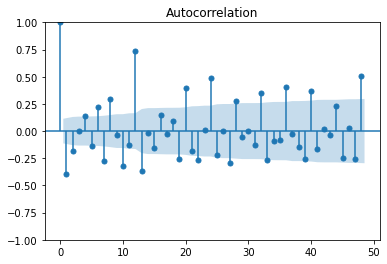

In [26]:
plot_acf(ProductionVolume['IOP'].diff().dropna(), lags=48);

<BarContainer object of 49 artists>

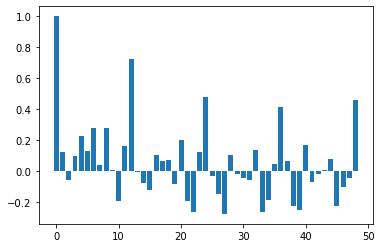

In [27]:
autocorr = acf(ProductionVolume['IOP'], nlags=48)
plt.bar(range(len(autocorr)), autocorr)


<AxesSubplot:xlabel='Date'>

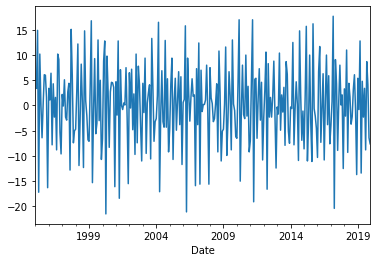

In [28]:
diffed_series = ProductionVolume['IOP'].diff()
diffed_series.plot()


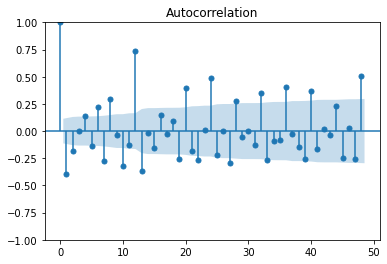

In [29]:
plot_acf(diffed_series.dropna(), lags=48);


### Provide your model choice: Alternating positive and negative, decaying to zero AR - Use PACF plot to identify order.
### Looking at the bar chart we can see the lags at 12, 24, 36, with each respectively going down toward zero. There was no need to difference
### The plot, but I just posted that to see. It doesn't look any better than the data that was originally posted.


## Part (b)
### 5 points

Plot the partial auto-correlation function (PACF). Based on the PACF plot and ACF plot, determine what values are likely best for `p` and `q`. 

Question 2 Part (c) should have determined the best value for `d`. Fill in your answer for `p`, `d`, and `q` in this text cell:

`p=` (AR) Autoregressive part displayed by the PACF Graph where the peaks are. 1 or 12.

`d=` 0. (reason provided in Question 2 Part (c)) There is no reason to use Differencing, even though I do display the differencing graphs.

`q=` (MA) Is the order of the moving average.  And is often the peak value from the ACF plot. 12 or 1 Could also be a good value. The data has a seasonality and is month over month making 12 a good value.

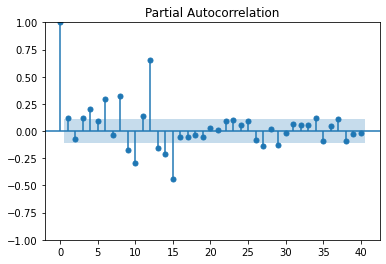

In [30]:
plot_pacf(ProductionVolume['IOP'], lags=40, method='ywm');

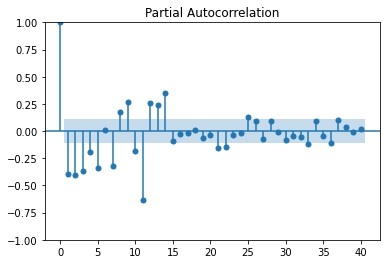

In [31]:
diffed_ProductionVolume = ProductionVolume['IOP'].diff(1)
plot_pacf(diffed_ProductionVolume.dropna(), lags=40, method='ywm');

# Question 4 - Model Fitting



## Part (a)
### 6 points

Given your determination of `p`, `d`, and `q`, fit an ARIMA model with those parameters using the entire time series as training data. Get the predicted values from the model (calling `predict` with `d` as the start value and including `typ='levels'` if `d>0`) and compute the mean squared error (MSE) between the predictions and the actual values.

In addition to printing the resulting MSE, plot the predictions alongside the actual values.

In [32]:
model = ARIMA(ProductionVolume['IOP'], order=(12,0,12)).fit()
model.summary()

C:\Users\dunca\anaconda3\envs\GIS\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\dunca\anaconda3\envs\GIS\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\dunca\anaconda3\envs\GIS\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\dunca\anaconda3\envs\GIS\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    IOP   No. Observations:                  300
Model:               ARIMA(12, 0, 12)   Log Likelihood                -729.195
Date:                Wed, 16 Feb 2022   AIC                           1510.389
Time:                        11:02:38   BIC                           1606.688
Sample:                    01-01-1995   HQIC                          1548.928
                         - 12-01-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        100.3406      1.105     90.840      0.000      98.176     102.506
ar.L1         -0.0226      0.060     -0.374      0.708      -0.141       0.096
ar.L2          0.0377      0.061      0.619      0.536      -0.082       0.157
ar.L3         -0.1272      0.061     -2.075      0.038      -0.247      -0.007
ar.L4         -0.0203      0.060     -0.336      0.737      -0.138       0.098
ar.L5         -0.0195      0.063     -0.311      0.756      -0.142       0.103
ar.L6          0.0149      0.049      0.302      0.763      -0.082       0.112
ar.L7         -0.1804      0.049     -3.719      0.000      -0.275      -0.085
ar.L8          0.1051      0.054      1.949      0.051      -0.001       0.211
ar.L9         -0.0842      0.053     -1.590      0.112      -0.188       0.020
ar.L10        -0.1785      0.055     -3.254      0.001      -0.286      -0.071
ar.L11         0.1744      0.061      2.854      0.004       0.055       0.294
ar.L12         0.7603      0.062     12.287      0.000       0.639       0.882
ma.L1         -0.0522      0.081     -0.647      0.518      -0.210       0.106
ma.L2          0.1820      0.075      2.438      0.015       0.036       0.328
ma.L3          0.5692      0.081      7.014      0.000       0.410       0.728
ma.L4          0.0241      0.096      0.251      0.802      -0.164       0.213
ma.L5          0.2410      0.090      2.688      0.007       0.065       0.417
ma.L6          0.3316      0.078      4.230      0.000       0.178       0.485
ma.L7          0.3059      0.082      3.719      0.000       0.145       0.467
ma.L8          0.1455      0.082      1.775      0.076      -0.015       0.306
ma.L9          0.5115      0.086      5.929      0.000       0.342       0.681
ma.L10         0.2428      0.080      3.039      0.002       0.086       0.399
ma.L11         0.0026      0.082      0.032      0.975      -0.158       0.163
ma.L12         0.1031      0.084      1.225      0.221      -0.062       0.268
sigma2         7.1423      0.673     10.608      0.000       5.823       8.462
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 5.57
Prob(Q):                              0.91   Prob(JB):                         0.06
Heteroskedasticity (H):               0.99   Skew:                            -0.20
Prob(H) (two-sided):                  0.96   Kurtosis:                         3.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [33]:
ProductionVolume['Predicted'] = model.predict()
print("MSE", np.square(np.subtract(ProductionVolume['IOP'],ProductionVolume['Predicted'])).mean())

MSE 8.397150822660523


In [34]:
MSE = mean([(ProductionVolume['IOP'][i] - ProductionVolume['Predicted'][i])**2 for i in range(len(ProductionVolume['IOP']))])
print('MSE', MSE)

MSE 8.397150822660524


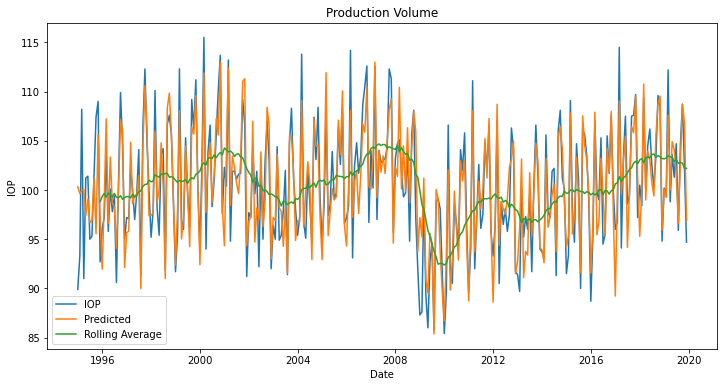

In [35]:
plt.figure(figsize=(12,6))
sns.lineplot(x='Date', y='IOP', data=ProductionVolume, label='IOP')
sns.lineplot(x='Date', y='Predicted', data=ProductionVolume, label='Predicted')
sns.lineplot(x='Date', y='Rolling Average', data=ProductionVolume, label='Rolling Average')
plt.title("Production Volume")
plt.show()


## Part (b)
### 4 points

To further assess the accuracy of the model, plot the residual errors of the model both as a **histogram** and as a **scatterplot**.

Based on these plots, are the residuals normally distributed? Are the mean and variance constant over time? Provide reasons with your answers. Include your answer either as a text cell or in-line comment.

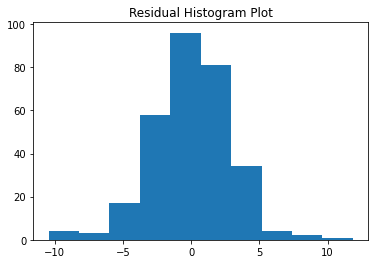

In [36]:
plt.hist(model.resid)
plt.title("Residual Histogram Plot")
plt.show()

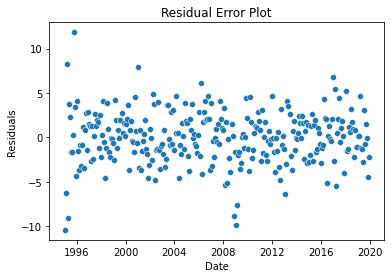

In [37]:
ProductionVolume['Residuals'] = model.resid
sns.scatterplot(data=ProductionVolume, x='Date', y='Residuals')
plt.title("Residual Error Plot")
plt.show()


### Based on these plots, are the residuals normally distributed? Yes. The histogram displays a normal distribution that appears ever so slightly scewed to the right.
### Are the mean and variance constant over time? Yes the means and variance are over time. Looking at the Residual scatter plot you can see a nice spread between -5 and 5. While there are a few outliers the mean and amount of variance appear be constant over time.


## Part (c)
### 2 points

Since the estimated parameters are not guaranteed to provide the best results, try fitting an ARIMA model with new parameters (different value for at least one of `p`, `d`, and `q`). Based on MSE, is your new model better or worse than your original in part (a)?

In [38]:
model2 = ARIMA(ProductionVolume['IOP'], order=(36,0,36)).fit()
ProductionVolume['Predicted2'] = model2.predict()
MSE2 = mean([(ProductionVolume['IOP'][i] - ProductionVolume['Predicted2'][i])**2 for i in range(len(ProductionVolume['IOP']))])
print('MSE', MSE2)

C:\Users\dunca\anaconda3\envs\GIS\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\dunca\anaconda3\envs\GIS\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\dunca\anaconda3\envs\GIS\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\dunca\anaconda3\envs\GIS\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\dunca\anaconda3\envs\GIS\lib\site-package

MSE 6.4137706978007


### This model took down the MSE. Making it a better fit. The Greater I increase my model by multiples of 12 for p and q the better it will get. But the longer it will take to run. Leaving the difference at 0

# Question 5 - Forecasting

For this question, use whichever model from question 4 ended up being the better one based on MSE.

## Part (a)
### 2 points

Use your model to forecast the next value and print the result.

In [39]:
md1 =pd.DataFrame(model.forecast(steps=50))
md2 =pd.DataFrame(model2.forecast(steps=50))
forecast = model2.get_forecast(50)
md2.index.names= ['Date']
md1.index.names= ['Date']
md3 = md1.merge(md2, on='Date', how='left').copy()
md3.rename(columns={'predicted_mean_x':'Predicted', 'predicted_mean_y':'Predicted2'}, inplace=True)
predict_it = pd.concat([ProductionVolume, md3]).copy()
predict_it['Predicted2 Rolling Average'] = predict_it['Predicted2'].rolling(window=12).mean()

forecast = model2.get_forecast(50)
conf_int = forecast.conf_int(alpha=0.05)
conf_int.index.names = ['Date']
predict_it = predict_it.merge(conf_int, on='Date', how='left').copy()
predict_it['lower_conf'] = predict_it['lower IOP'].rolling(window=12).mean()
predict_it['upper_conf'] = predict_it['upper IOP'].rolling(window=12).mean()

predict_it


,IOP,Rolling Average,Rolling STD,Year,Month,lag_1,lag_12,Predicted,Residuals,Predicted2,Predicted2 Rolling Average,lower IOP,upper IOP,lower_conf,upper_conf
Date,,,,,,,,,,,,,,,
1995-01-01,89.9,NaN,NaN,1995.0,1.0,NaN,NaN,100.340595,-10.440595,100.326538,NaN,NaN,NaN,NaN,NaN
1995-02-01,93.3,NaN,NaN,1995.0,2.0,3.4,NaN,99.626619,-6.326619,98.458145,NaN,NaN,NaN,NaN,NaN
1995-03-01,108.2,NaN,NaN,1995.0,3.0,14.9,NaN,99.939568,8.260432,100.006583,NaN,NaN,NaN,NaN,NaN
1995-04-01,91.0,NaN,NaN,1995.0,4.0,-17.2,NaN,100.045481,-9.045481,102.052650,NaN,NaN,NaN,NaN,NaN
1995-05-01,101.2,NaN,NaN,1995.0,5.0,10.2,NaN,97.407699,3.792301,96.390579,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,104.016490,NaN,105.692386,100.730736,98.072776,113.311995,93.237534,108.223939
2023-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.532649,NaN,107.786213,100.781311,100.157048,115.415378,93.263784,108.298839
2023-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93.101641,NaN,90.009440,100.626183,82.380417,97.638463,93.085676,108.166690


In [40]:
print("Next value predicted for model2:", predict_it.iloc[len(ProductionVolume['IOP'])+1]['Predicted2'])

Next value predicted for model2: 94.28080111574718


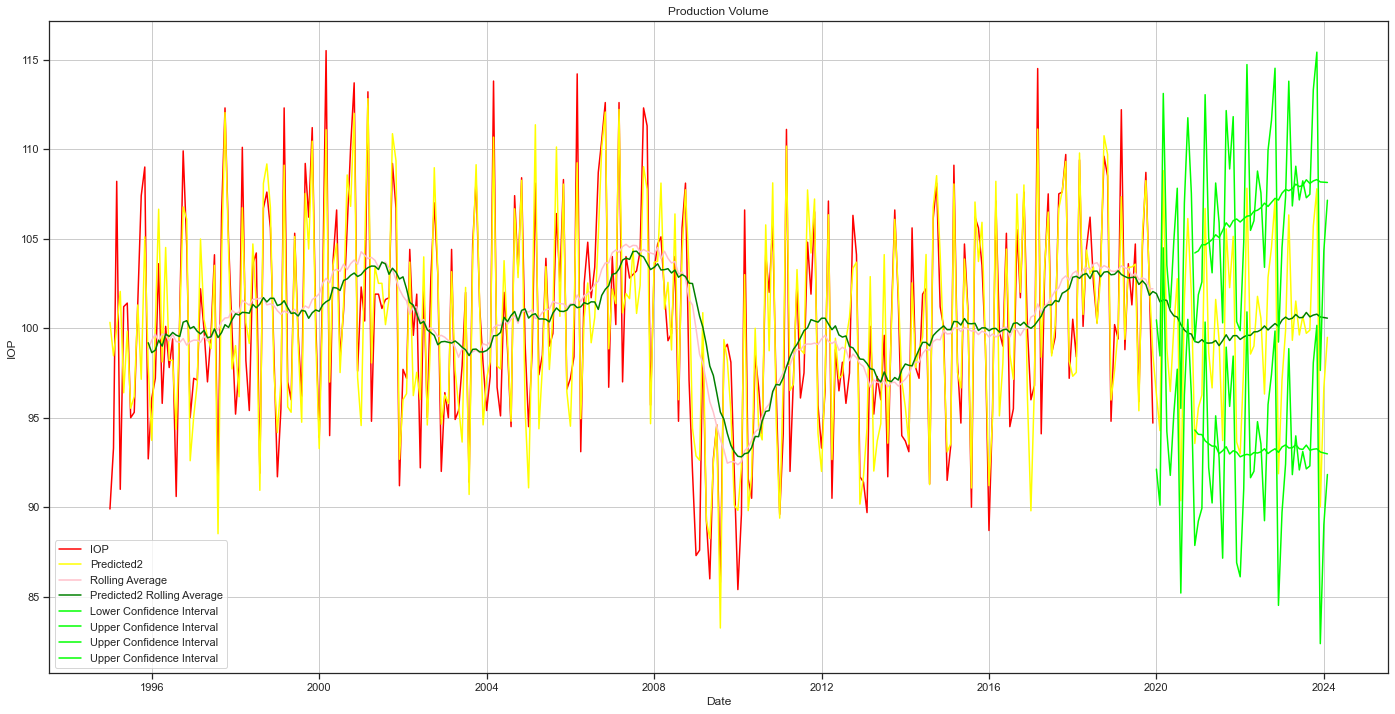

In [41]:
plt.figure(figsize=(24,12))
sns.set(style='ticks')
sns.lineplot(x='Date', y='IOP', data=predict_it, label='IOP', color='red')
#sns.lineplot(x='Date', y='Predicted', data=predict_it, label='Predicted')
sns.lineplot(x='Date', y='Predicted2', data=predict_it, label='Predicted2', color='yellow')
sns.lineplot(x='Date', y='Rolling Average', data=predict_it, label='Rolling Average', color='pink')
sns.lineplot(x='Date', y='Predicted2 Rolling Average', data=predict_it, label='Predicted2 Rolling Average', color='green')
sns.lineplot(x='Date', y='lower IOP', data=predict_it, label='Lower Confidence Interval', color='lime')
sns.lineplot(x='Date', y='upper IOP', data=predict_it, label='Upper Confidence Interval', color='lime')
sns.lineplot(x='Date', y='upper_conf', data=predict_it, label='Upper Confidence Interval', color='lime')
sns.lineplot(x='Date', y='lower_conf', data=predict_it, label='Upper Confidence Interval', color='lime')
plt.title("Production Volume")
plt.grid()
plt.show()

## Part (b)
### 2 points

Use `plot_predict` to plot the actual data, the model's predictions for the actual data, and the confidence interval and forecasts for the next 50 steps.

In [ ]:
model3 = ARIMA(ProductionVolume['IOP'], order=(36,0,36))
res = model3.fit()
res.plot_predict(start=1, end=len(ProductionVolume['IOP'])+50)
plt.show()

In [ ]:
plt.figure(figsize=(24,12))
sns.set(style='ticks')
sns.lineplot(x='Date', y='IOP', data=predict_it, label='IOP', color='red')
#sns.lineplot(x='Date', y='Predicted', data=predict_it, label='Predicted')
sns.lineplot(x='Date', y='Predicted2', data=predict_it[len(ProductionVolume['IOP']):], label='Predicted2', color='yellow')
sns.lineplot(x='Date', y='Rolling Average', data=predict_it, label='Rolling Average', color='pink')
sns.lineplot(x='Date', y='Predicted2 Rolling Average', data=predict_it, label='Predicted2 Rolling Average', color='green')
#sns.lineplot(x='Date', y='lower IOP', data=predict_it, label='Lower Confidence Interval', color='red')
#sns.lineplot(x='Date', y='upper IOP', data=predict_it, label='Upper Confidence Interval', color='red')
sns.lineplot(x='Date', y='upper_conf', data=predict_it, label='Upper Confidence Interval', color='lime')
sns.lineplot(x='Date', y='lower_conf', data=predict_it, label='Lower Confidence Interval', color='lime')
plt.title("Production Volume")
plt.grid()
plt.show()

In [ ]:
#5b